In [1]:
from yahoo_fin.stock_info import get_data
from datetime import date
import plotly.express as px
import pandas as pd
import numpy as np
import time
from pathlib import Path
import csv
import seaborn as sns
import scipy.optimize as sco
import matplotlib.pyplot as plt
import scipy
%matplotlib inline


today = date.today()
spy = get_data("spy", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")
xle = get_data("xle", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")
gold = get_data("GLD", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")
tlt = get_data("tlt", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")
usd = get_data("tlt", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")

In [2]:
# @TODO: Set file paths for btc_data.csv and eth_data.csv
btc_filepath = Path('Resources/BTC-USD.csv')
btc_df = pd.read_csv(btc_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

btc_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
btc_df.sort_index(inplace=True)
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
eth_filepath = Path('Resources/ETH-USD.csv')
eth_df = pd.read_csv(eth_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

eth_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [5]:
column = ['BTC', 'ETH', 'SPY', 'XLE', 'GLD', 'TLT']

combined_df = pd.concat([btc_df['Close'], eth_df['Close'], spy['close'], xle['close'], gold['close'], tlt['close']], axis="columns", join="inner")
combined_df.columns = (['BTC', 'ETH', 'SPY', 'XLE', 'GLD', 'TLT'])
combined_df.head()

,BTC,ETH,SPY,XLE,GLD,TLT
2016-01-04,433.091003,0.954480,201.020004,60.299999,102.889999,121.449997
2016-01-05,431.959991,0.950176,201.360001,60.529999,103.180000,120.959999
2016-01-06,429.105011,0.950860,198.820007,58.200001,104.669998,122.589996
2016-01-07,458.048004,0.942005,194.050003,56.779999,106.150002,122.809998
2016-01-08,453.230011,0.986789,191.919998,56.049999,105.680000,123.360001


In [6]:
combined_df.isnull().sum()

BTC    5
ETH    5
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

In [7]:
portfolio_returns  = combined_df.dropna()

In [8]:
portfolio_returns.isnull().sum()

BTC    0
ETH    0
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

In [9]:
portfolio_returns = portfolio_returns.pct_change()
#Dataframe for Efficient Frontier Calc.
df2 = portfolio_returns

In [10]:
portfolio_returns  = portfolio_returns.dropna()


In [11]:
portfolio_returns.isnull().sum()


BTC    0
ETH    0
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

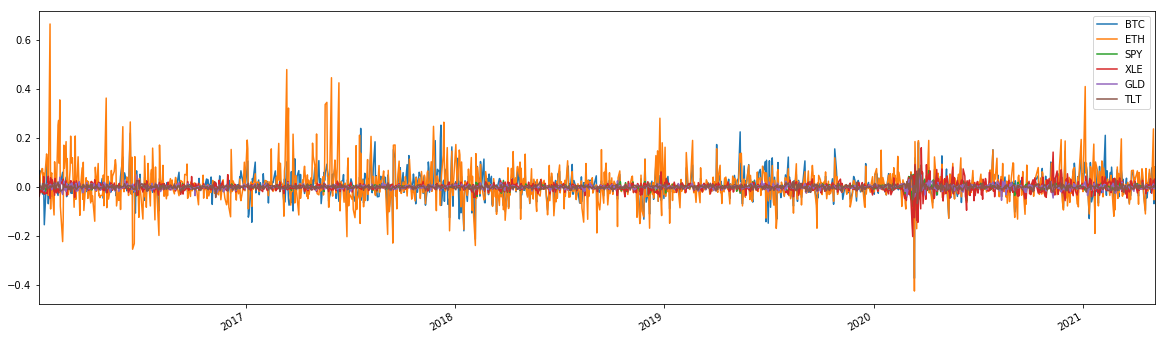

In [12]:
portfolio_returns.plot(figsize=(20,6))

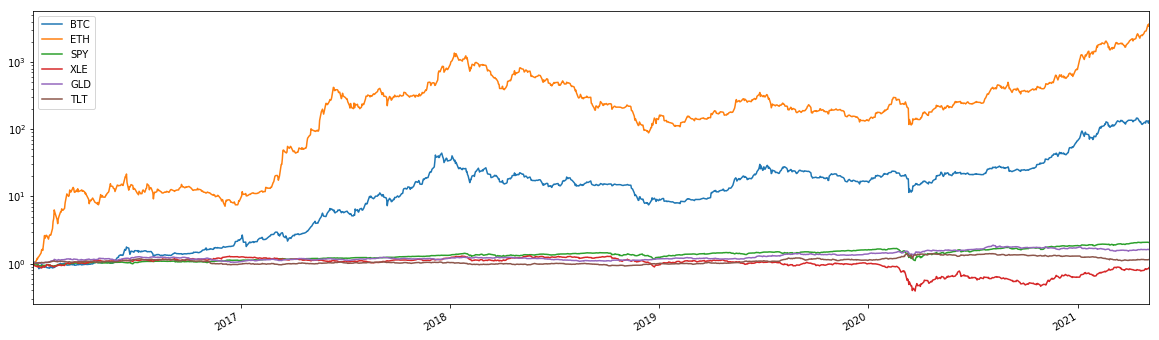

In [13]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,6),logy=True)


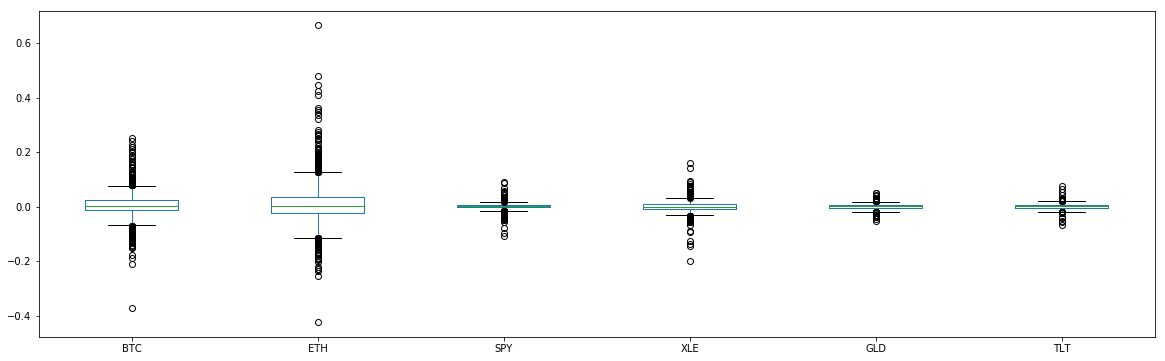

In [14]:
portfolio_returns.plot(kind='box',figsize=(20,6))

In [15]:
volatility = portfolio_returns.std()
volatility

BTC    0.047101
ETH    0.075262
SPY    0.011744
XLE    0.020553
GLD    0.008816
TLT    0.008734
dtype: float64

In [16]:
volatility = portfolio_returns.std() * np.sqrt(252)
volatility

BTC    0.747697
ETH    1.194741
SPY    0.186429
XLE    0.326274
GLD    0.139945
TLT    0.138652
dtype: float64

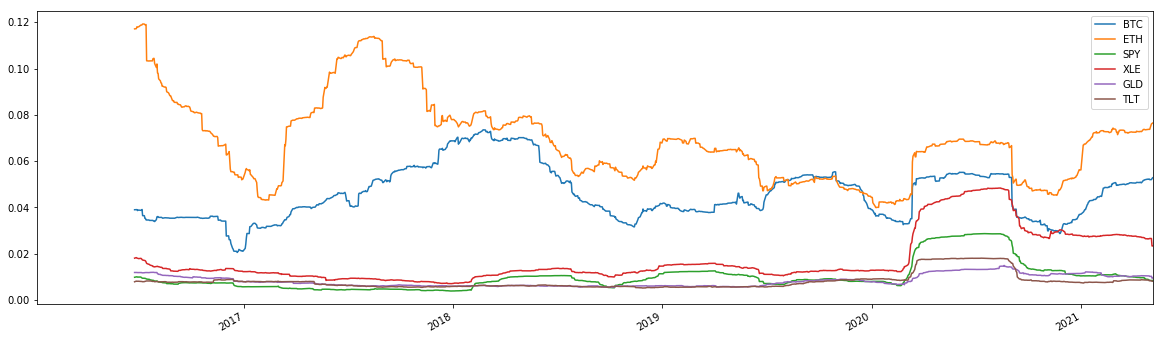

In [17]:
# Calculate the rolling standard deviation for all portfolios using a 120-day window
roll = portfolio_returns.rolling(window=120).std()
# Plot the rolling standard deviation
portfolio_returns.rolling(window=120).std().plot(figsize=(20,6))

In [18]:
# Calculate the correlation
price_correlation = portfolio_returns.corr()
# Display de correlation matrix
price_correlation

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,1.000000,0.520378,0.151707,0.123605,0.114793,-0.037814
ETH,0.520378,1.000000,0.133469,0.101906,0.104227,-0.017635
SPY,0.151707,0.133469,1.000000,0.714004,-0.005551,-0.390536
XLE,0.123605,0.101906,0.714004,1.000000,-0.023311,-0.338339
GLD,0.114793,0.104227,-0.005551,-0.023311,1.000000,0.331360
TLT,-0.037814,-0.017635,-0.390536,-0.338339,0.331360,1.000000


In [19]:
# Use `ewm` to calculate the rolling window

portfolio_returns.ewm(halflife=21).mean().head()

,BTC,ETH,SPY,XLE,GLD,TLT
2016-01-05,-0.002611,-0.004509,0.001691,0.003814,0.002819,-0.004035
2016-01-06,-0.004643,-0.001852,-0.005579,-0.017689,0.008726,0.004865
2016-01-07,0.020185,-0.004421,-0.011920,-0.019999,0.010590,0.003808
2016-01-08,0.012125,0.009220,-0.011673,-0.018124,0.006648,0.003984
2016-01-11,0.007276,0.023432,-0.008970,-0.018826,0.003331,0.000798


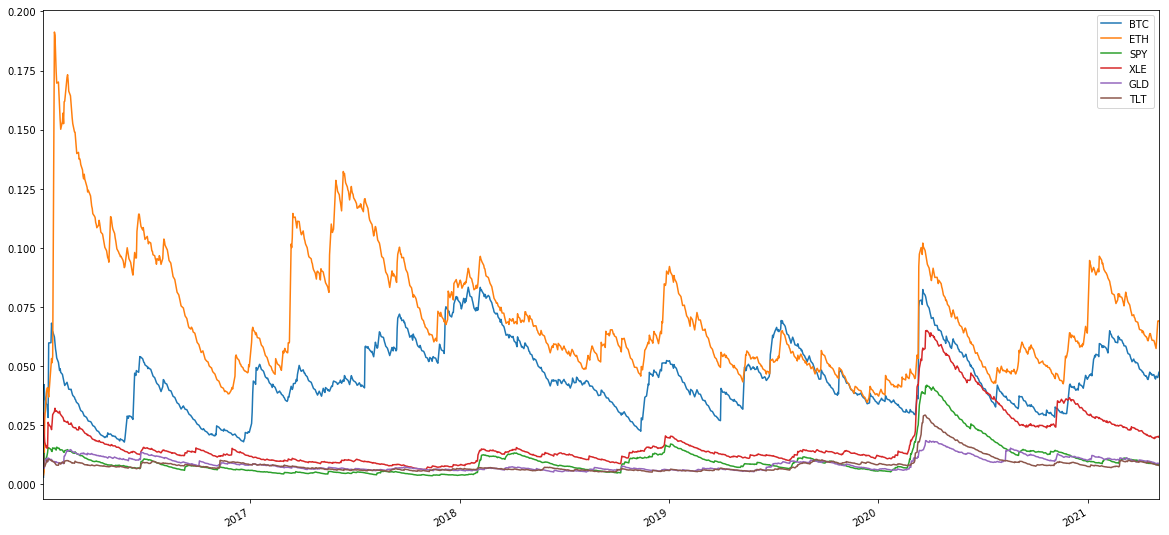

In [20]:
portfolio_returns.ewm(halflife=21).std().plot(figsize=(20, 10))

In [21]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios


BTC    1.607789
ETH    1.864269
SPY    0.827579
XLE    0.084144
GLD    0.723592
TLT    0.259128
dtype: float64

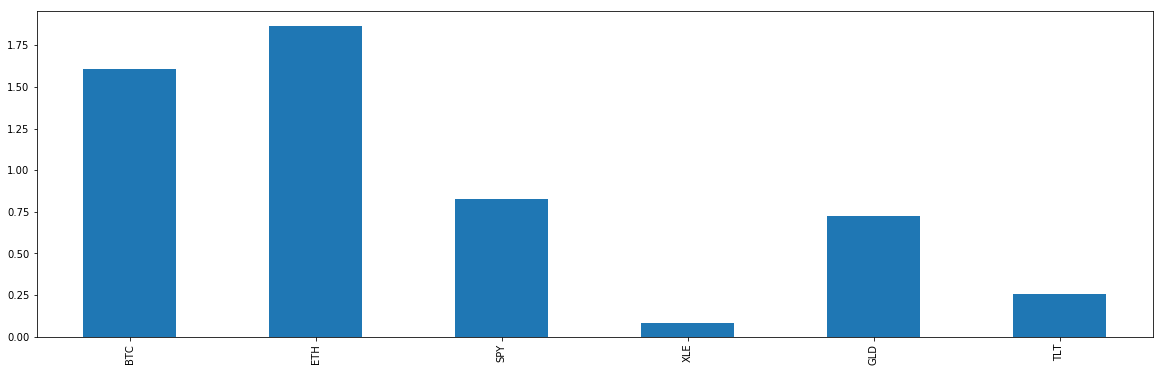

In [22]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',figsize=(20,6))

In [23]:
# Calculate and plot the correlation
price_correlation_new = portfolio_returns.corr()
# Display de correlation matrix
price_correlation_new

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,1.000000,0.520378,0.151707,0.123605,0.114793,-0.037814
ETH,0.520378,1.000000,0.133469,0.101906,0.104227,-0.017635
SPY,0.151707,0.133469,1.000000,0.714004,-0.005551,-0.390536
XLE,0.123605,0.101906,0.714004,1.000000,-0.023311,-0.338339
GLD,0.114793,0.104227,-0.005551,-0.023311,1.000000,0.331360
TLT,-0.037814,-0.017635,-0.390536,-0.338339,0.331360,1.000000


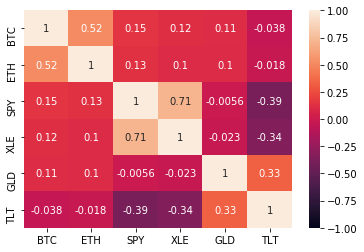

In [24]:
sns.heatmap(price_correlation_new, vmin=-1, vmax=1,annot=True)

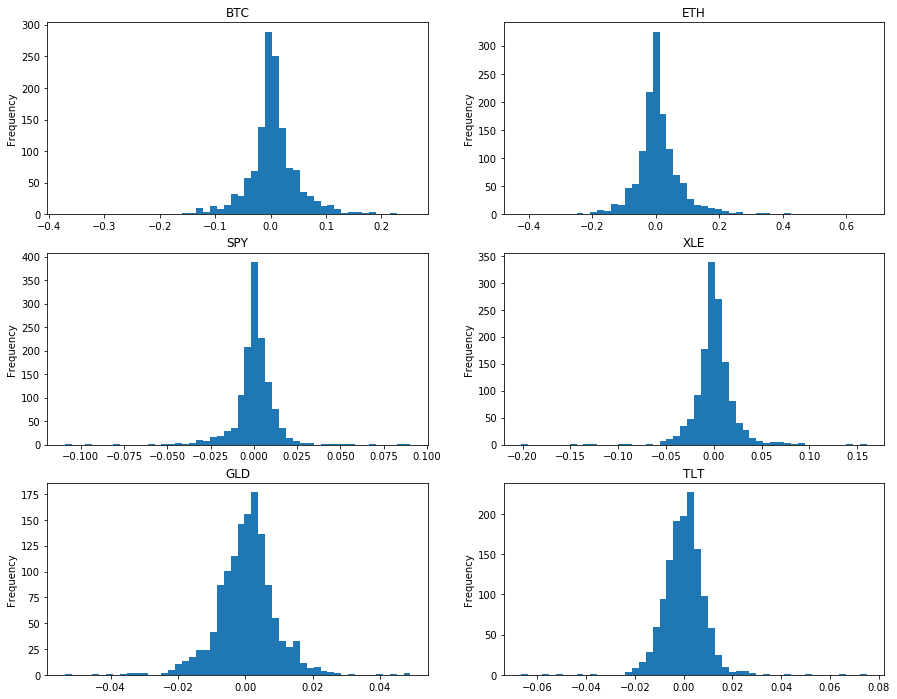

In [25]:
# Distribution Histogram


plt.subplot(3, 2, 1)
portfolio_returns['BTC'].plot.hist(bins = 50,figsize=(15,12))
plt.title('BTC')

  
plt.subplot(3, 2, 2)
portfolio_returns['ETH'].plot.hist(bins = 50)
plt.title('ETH')
  
plt.subplot(3, 2, 3)
portfolio_returns['SPY'].plot.hist(bins = 50)
plt.title('SPY')

plt.subplot(3, 2, 4)
portfolio_returns['XLE'].plot.hist(bins = 50)
plt.title('XLE')

plt.subplot(3, 2, 5)
portfolio_returns['GLD'].plot.hist(bins = 50)
plt.title('GLD')

plt.subplot(3, 2, 6)
portfolio_returns['TLT'].plot.hist(bins = 50)
plt.title('TLT')
  
plt.show()

# portfolio_returns['BTC'].plot.hist(stacked=True, bins=50)




In [26]:
# Set weights
weights = [0,0,1/4,1/4,1/4,1/4]

# Calculate portfolio return

portfolio_returns_weight= portfolio_returns.dot(weights)
# portfolio_returns_new.set_index('Date')

portfolio_returns_weight.dropna()

# Display sample data
portfolio_returns_weight.head()

2016-01-05    0.001072
2016-01-06   -0.005798
2016-01-07   -0.008114
2016-01-08   -0.005946
2016-01-11   -0.010064
dtype: float64

In [27]:
#Conavriance
portfolio_returns.cov()

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,0.002218,0.001845,8.391558e-05,0.000120,4.766486e-05,-0.000016
ETH,0.001845,0.005664,1.179682e-04,0.000158,6.915274e-05,-0.000012
SPY,0.000084,0.000118,1.379193e-04,0.000172,-5.746919e-07,-0.000040
XLE,0.000120,0.000158,1.723438e-04,0.000422,-4.223850e-06,-0.000061
GLD,0.000048,0.000069,-5.746919e-07,-0.000004,7.771642e-05,0.000026
TLT,-0.000016,-0.000012,-4.005898e-05,-0.000061,2.551427e-05,0.000076


In [28]:
portfolio_returns.cov() * 252

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,0.559051,0.464856,0.021147,0.030154,0.012012,-0.003920
ETH,0.464856,1.427405,0.029728,0.039724,0.017426,-0.002921
SPY,0.021147,0.029728,0.034756,0.043431,-0.000145,-0.010095
XLE,0.030154,0.039724,0.043431,0.106455,-0.001064,-0.015306
GLD,0.012012,0.017426,-0.000145,-0.001064,0.019585,0.006430
TLT,-0.003920,-0.002921,-0.010095,-0.015306,0.006430,0.019224


In [29]:
#Efficient Frontier
df=portfolio_returns
# Calculate annualized average return for each stock. Annualized average return = Daily average return * 252 business days.
r = np.mean(df,axis=0)*252

# Create a covariance matrix
covar = df.cov()

In [30]:
#Define frequently used functions.
# r is each stock's return, w is the portion of each stock in our portfolio, and covar is the covariance matrix
# Rate of return
def ret(r,w):
    return r.dot(w)
# Risk level - or volatility
def vol(w,covar):
    return np.sqrt(np.dot(w,np.dot(w,covar)))
def sharpe (ret,vol):
    return ret/vol

In [31]:
# All weights, of course, must be between 0 and 1. Thus we set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)

# The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(np.ones((df2.shape[1],), dtype=int),1,1)

# Find a portfolio with the minimum risk.
from scipy.optimize import minimize
#Create x0, the first guess at the values of each stock's weight.
weights = np.ones(df2.shape[1])
x0 = weights/np.sum(weights)
#Define a function to calculate volatility
fun1 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar)))
res = minimize(fun1,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

np.set_printoptions(suppress = True, precision=2)
print(w_min)
print('return: % .2f'% (ret(r,w_min)*100), 'risk: % .3f'% vol(w_min,covar))

[0.   0.   0.33 0.   0.2  0.47]
return:  8.86 risk:  0.005


In [32]:
#Define 1/Sharpe_ratio
fun2 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar)))/r.dot(w)
res_sharpe = minimize(fun2,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
w_sharpe = res_sharpe.x
print(w_sharpe)
print('return: % .2f'% (ret(r,w_sharpe)*100), 'risk: % .3f'% vol(w_sharpe,covar))

[0.09 0.09 0.32 0.   0.2  0.29]
return:  39.52 risk:  0.011


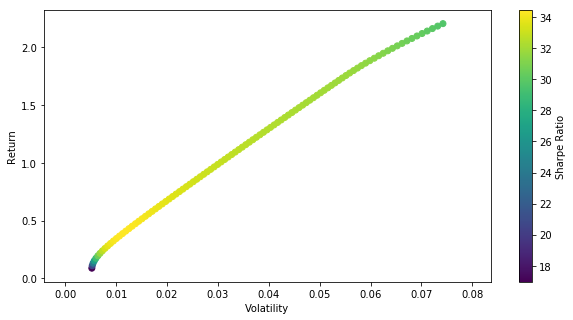

In [33]:
w = w_min
num_ports = 100
gap = (np.amax(r) - ret(r,w_min))/num_ports


all_weights = np.zeros((num_ports, len(df.columns)))
all_weights[0],all_weights[1]=w_min,w_sharpe
ret_arr = np.zeros(num_ports)
ret_arr[0],ret_arr[1]=ret(r,w_min),ret(r,w_sharpe)
vol_arr = np.zeros(num_ports)
vol_arr[0],vol_arr[1]=vol(w_min,covar),vol(w_sharpe,covar)

for i in range(num_ports):
    port_ret = ret(r,w) + i*gap
    double_constraint = LinearConstraint([np.ones(df2.shape[1]),r],[1,port_ret],[1,port_ret])
    
    #Create x0: initial guesses for weights.
    x0 = w_min
    #Define a function for portfolio volatility.
    fun = lambda w: np.sqrt(np.dot(w,np.dot(w,covar)))
    a = minimize(fun,x0,method='trust-constr',constraints = double_constraint,bounds = bounds)
    
    all_weights[i,:]=a.x
    ret_arr[i]=port_ret
    vol_arr[i]=vol(a.x,covar)
    
sharpe_arr = ret_arr/vol_arr  

plt.figure(figsize=(10,5))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [34]:
combined_df_MC = combined_df.dropna()

In [35]:
combined_df_MC

,BTC,ETH,SPY,XLE,GLD,TLT
2016-01-04,433.091003,0.954480,201.020004,60.299999,102.889999,121.449997
2016-01-05,431.959991,0.950176,201.360001,60.529999,103.180000,120.959999
2016-01-06,429.105011,0.950860,198.820007,58.200001,104.669998,122.589996
2016-01-07,458.048004,0.942005,194.050003,56.779999,106.150002,122.809998
2016-01-08,453.230011,0.986789,191.919998,56.049999,105.680000,123.360001
2016-01-11,448.428009,1.061600,192.110001,54.849998,104.739998,122.010002
2016-01-12,435.690002,1.141000,193.660004,54.980000,104.209999,123.769997
2016-01-13,432.371002,1.125200,188.830002,53.660000,104.720001,124.989998
2016-01-14,430.306000,1.189590,191.929993,55.970001,103.019997,123.820000
2016-01-15,364.330994,1.208010,187.809998,54.349998,104.080002,125.750000


In [36]:

import os
import requests
import pandas as pd
from dotenv import load_dotenv

from MCForecastTools import MCSimulation

In [37]:
index_names = [
["BTC", "ETH",  "SPY",  "XLE",  "GLD",  "TLT"],
["close", "close","close","close","close","close"]
]
index_tuples = list(zip(*index_names))
new_index = pd.MultiIndex.from_tuples(index_tuples,names=["first", "second"])
combined_df_MC.columns = new_index

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


MC_thirty_weights_2 = MCSimulation(
    combined_df_MC,
    weights = [.05,.05,.45,0,0,.45],
    num_simulation = 200,
    num_trading_days = 252*5
)

In [39]:
MC_thirty_weights_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012101,1.014157,1.002022,1.015663,0.999851,1.001802,0.996191,1.003170,1.001408,0.985280,...,0.996161,0.995587,0.997538,1.001095,0.995809,1.000938,1.003223,1.008250,1.001893,0.995746
2,1.021243,1.033386,1.000663,1.006306,0.990972,1.015276,0.989268,1.003732,1.001452,0.998237,...,1.010657,0.983186,1.000090,0.997337,0.988609,1.016802,1.001068,1.002694,1.006528,0.990260
3,1.040281,1.027530,0.987838,1.011840,1.002166,1.028381,0.988130,1.001379,1.002015,0.981794,...,1.002256,0.981239,1.015561,0.999219,0.980980,1.013710,0.989831,1.004283,0.989209,0.988811
4,1.043647,1.026339,0.988031,1.006065,1.010331,1.038495,0.974825,1.010274,1.008308,0.988518,...,0.994151,0.988000,1.021009,0.997083,0.979267,1.002310,0.982181,1.008940,0.980970,1.003636
5,1.044371,1.028922,0.977745,1.011792,1.011010,1.049782,0.969969,1.018078,1.008808,0.985619,...,0.992926,0.999072,1.018510,0.987827,0.984686,1.014680,0.986619,1.009198,0.974499,0.997833
6,1.043259,1.022357,0.986262,1.008537,1.001797,1.044029,0.958419,1.004573,1.011526,0.997944,...,0.997532,1.007252,1.020463,0.990524,0.983733,1.024487,1.006330,1.020323,0.985172,0.987522
7,1.039231,1.036299,0.989271,1.005337,1.014705,1.030866,0.973550,1.018801,1.005219,1.007490,...,0.994421,1.013499,1.025243,0.982956,0.975766,1.024183,1.004511,1.033495,0.984116,0.992419
8,1.046775,1.048917,0.985825,1.009636,1.013436,1.025514,0.974294,1.031170,1.012517,1.015395,...,1.005566,1.026474,1.031271,0.975236,0.973324,1.034727,1.006088,1.026859,0.978514,0.998326
9,1.042355,1.054927,0.981198,1.000926,1.008022,1.028847,0.964860,1.036865,1.024171,1.017489,...,1.004643,1.036025,1.027952,0.987878,0.973838,1.041558,1.019862,1.014900,0.962969,0.991781


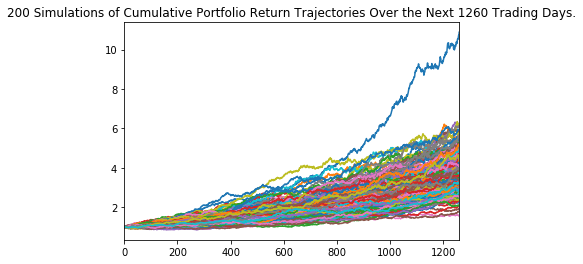

In [40]:
# Plot simulation outcomes
line_plot = MC_thirty_weights_2.plot_simulation()

In [41]:
import pandas as pd
import numpy as np
from functools import reduce
# import pandas_datareader.data as web
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
figsize = (15, 8)

In [107]:
portfolio_returns.head()

,BTC,ETH,SPY,XLE,GLD,TLT
2016-01-05,-0.002611,-0.004509,0.001691,0.003814,0.002819,-0.004035
2016-01-06,-0.006609,0.000720,-0.012614,-0.038493,0.014441,0.013476
2016-01-07,0.067450,-0.009313,-0.023992,-0.024399,0.014140,0.001795
2016-01-08,-0.010519,0.047541,-0.010977,-0.012857,-0.004428,0.004478
2016-01-11,-0.010595,0.075813,0.000990,-0.021409,-0.008895,-0.010944


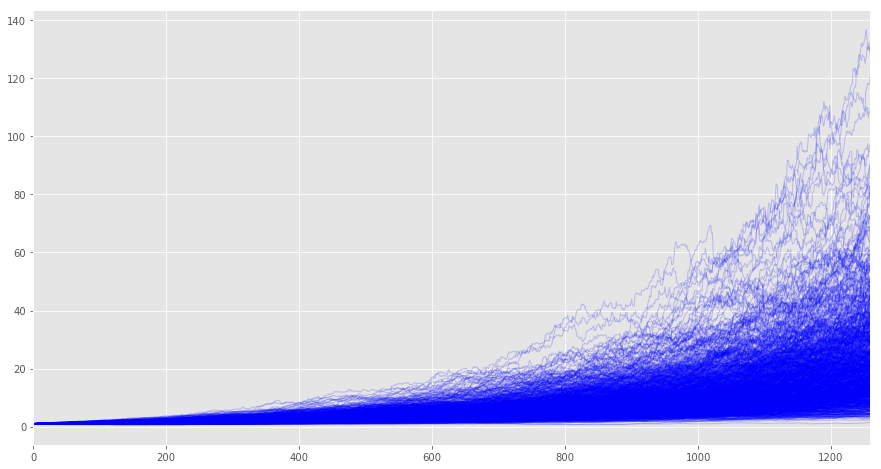

In [43]:
portfolio_returns2 = portfolio_returns.mean(axis=1)

portfolio_bootstrapping = (1+pd.DataFrame([random.choices(list(
    portfolio_returns2.values), k=252*5) for i in 
    range(1000)]).T.shift(1).fillna(0)).cumprod()

portfolio_bootstrapping.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='b')

In [104]:
portfolio_returns.head()

,BTC,ETH,SPY,XLE,GLD,TLT
2016-01-05,-0.002611,-0.004509,0.001691,0.003814,0.002819,-0.004035
2016-01-06,-0.006609,0.000720,-0.012614,-0.038493,0.014441,0.013476
2016-01-07,0.067450,-0.009313,-0.023992,-0.024399,0.014140,0.001795
2016-01-08,-0.010519,0.047541,-0.010977,-0.012857,-0.004428,0.004478
2016-01-11,-0.010595,0.075813,0.000990,-0.021409,-0.008895,-0.010944


In [45]:
Cov_CAPM = portfolio_returns.cov()

In [46]:
Cov_CAPM

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,0.002218,0.001845,8.391558e-05,0.000120,4.766486e-05,-0.000016
ETH,0.001845,0.005664,1.179682e-04,0.000158,6.915274e-05,-0.000012
SPY,0.000084,0.000118,1.379193e-04,0.000172,-5.746919e-07,-0.000040
XLE,0.000120,0.000158,1.723438e-04,0.000422,-4.223850e-06,-0.000061
GLD,0.000048,0.000069,-5.746919e-07,-0.000004,7.771642e-05,0.000026
TLT,-0.000016,-0.000012,-4.005898e-05,-0.000061,2.551427e-05,0.000076


In [47]:
Var_CAPM = portfolio_returns['SPY'].var()

In [48]:
Var_CAPM

0.0001379193364281354

In [49]:
Beta = Cov_CAPM['SPY']/Var_CAPM

In [50]:
Beta

BTC    0.608440
ETH    0.855342
SPY    1.000000
XLE    1.249598
GLD   -0.004167
TLT   -0.290452
Name: SPY, dtype: float64

In [51]:
risk_free_return = 1.64/100
market_return = 13.8/100
expected_return = risk_free_return + Beta*(market_return-risk_free_return)


In [52]:
expected_return

BTC    0.090386
ETH    0.120410
SPY    0.138000
XLE    0.168351
GLD    0.015893
TLT   -0.018919
Name: SPY, dtype: float64

In [53]:
Beta*market_return

BTC    0.083965
ETH    0.118037
SPY    0.138000
XLE    0.172445
GLD   -0.000575
TLT   -0.040082
Name: SPY, dtype: float64

In [54]:
CAPM = expected_return * w_sharpe

In [55]:
w_sharpe

array([0.09, 0.09, 0.32, 0.  , 0.2 , 0.29])

In [56]:
CAPM

BTC    7.947562e-03
ETH    1.126927e-02
SPY    4.472890e-02
XLE    7.307630e-07
GLD    3.230230e-03
TLT   -5.507480e-03
Name: SPY, dtype: float64

In [57]:
CAPM.sum()

0.061669207724689326

In [102]:
portfolio_returns.head()

,BTC,ETH,SPY,XLE,GLD,TLT
2016-01-05,-0.002611,-0.004509,0.001691,0.003814,0.002819,-0.004035
2016-01-06,-0.006609,0.000720,-0.012614,-0.038493,0.014441,0.013476
2016-01-07,0.067450,-0.009313,-0.023992,-0.024399,0.014140,0.001795
2016-01-08,-0.010519,0.047541,-0.010977,-0.012857,-0.004428,0.004478
2016-01-11,-0.010595,0.075813,0.000990,-0.021409,-0.008895,-0.010944


In [81]:
combined_df_month = combined_df.resample('M', how=lambda x: x[-1])


/Users/andrebacellardemiranda/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [82]:
fama_df = combined_df_month* w_sharpe

In [85]:
fama_df['Portfolio'] = fama_df['BTC'] + fama_df['ETH'] + fama_df['SPY']+ fama_df['XLE']+fama_df['GLD']+fama_df['TLT']

In [100]:
fama_df['Portfolio'].head()

2016-01-31    155.184623
2016-02-29    164.059026
2016-03-31    166.255091
2016-04-30    170.385416
2016-05-31    177.535099
Freq: M, Name: Portfolio, dtype: float64

In [87]:
# Pandas to read csv file and other things
import pandas as pd
# Datareader to download price data from Yahoo Finance
import pandas_datareader as web
# Statsmodels to run our multiple regression model
import statsmodels.api as smf
# To download the Fama French data from the web
import urllib.request
# To unzip the ZipFile 
import zipfile

In [93]:

# Web url
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip"

# Download the file and save it
# We will name it fama_french.zip file

urllib.request.urlretrieve(ff_url,'fama_french.zip')
zip_file = zipfile.ZipFile('fama_french.zip', 'r')

# Next we extact the file data

zip_file.extractall()

# Make sure you close the file after extraction

zip_file.close()

# Now open the CSV file

ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows = 3, index_col = 0)
# We want to find out the row with NULL value
# We will skip these rows

ff_row = ff_factors.isnull().any(1).nonzero()[0][0]

# Read the csv file again with skipped rows
ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows = 3, nrows = ff_row, index_col = 0)

# Format the date index
ff_factors.index = pd.to_datetime(ff_factors.index, format= '%Y%m')

# Format dates to end of month
ff_factors.index = ff_factors.index + pd.offsets.MonthEnd()

# Convert from percent to decimal
ff_factors = ff_factors.apply(lambda x: x/ 100)
ff_factors.head()

/Users/andrebacellardemiranda/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead


,Mkt-RF,SMB,HML,RF
1926-07-31,0.0296,-0.0230,-0.0287,0.0022
1926-08-31,0.0264,-0.0140,0.0419,0.0025
1926-09-30,0.0036,-0.0132,0.0001,0.0023
1926-10-31,-0.0324,0.0004,0.0051,0.0032
1926-11-30,0.0253,-0.0020,-0.0035,0.0031


In [98]:

# Get FF data
ff_data = ff_factors
ff_last = ff_data.index[ff_data.shape[0] - 1].date()
#Get the fund price data
# price_data = get_price_data(ticker,start,end)
# price_data = price_data.loc[:ff_last]
# ret_data = get_return_data(price_data, "M")
ret_data = fama_df['Portfolio'].pct_change().dropna()
all_data = pd.merge(pd.DataFrame(ret_data),ff_data, how = 'inner', left_index= True, right_index= True)
all_data.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)
all_data['port_excess'] = all_data['Portfolio'] - all_data['RF']
# Run the model
model = smf.formula.ols(formula = "port_excess ~ mkt_excess + SMB + HML", data = all_data).fit()
model.params

Intercept     0.062721
mkt_excess    1.228944
SMB          -0.817272
HML           0.525647
dtype: float64